# This model contains only pyramidal neurons in EC3, CA3, CA1. 


* 150 pA input to EC3
* CA1 starts spiking around 3 mins after only EC3 training. 
* This simulation is supposed to be preliminary test of familiarization training. Leave this notebook unchanged. 
        
## Moderate learning rate, low jump

In [56]:
# import required libraries
import numpy as np
from brian2 import *
import pylab

# allows plotting inline

%matplotlib inline 

In [57]:
# start virtual oscilloscope to record shit

start_scope()

### intial stuff

In [58]:
# leave this as is. This is for checking our model everytime.
CA1_size = 100 # how pyramidal many neurons in CA1
CA3_size = 100 # how pyramidal many neurons in CA3
EC3_size = 100 # how pyramidal many neurons in EC3



# 1. Models

### This is a weakly adapting CA1 pyramidal model (izhikevich) taken from Ferguson et al (2015)

* The first weakly adapting model from Ferguson (2015)
* V<sub>r</sub> =  -61.8 mV
* V<sub>t</sub> =  -57.0 mV
* c = -65.8mV
* d = 5  pA 
* a = 0.001/ms
* b = 3 * nsiemens
* V<sub>peak</sub> =  22.6 mV
* k<sub>low</sub> = .5 nS/mV 
* k<sub>high</sub> =  3.3 nS/mV
* I<sub>shift</sub> = -45 pA

In [59]:
# CA1 pyramidal neuron parameters.  
CA1_a = 0.001/ms
CA1_b = 3 * nsiemens
CA1_c = -65.8 *mV
CA1_d = 5  *pA #I think I shoudl use pico amps for this.. seriously 
CA1_theta_reset = 22.6 * mV # this is v_peak. There is no such thing as a firing threshold. 
CA1_v_r = -61.8 # mV
CA1_v_t = -57.0 # mV 
CA1_C = 300 * pF
CA1_k_low = .5 * nsiemens/mV
CA1_k_high = 3.3 * nsiemens/mV

CA1_I_shift = -45 *pA

# channel stuff
E_syn = 0 *mV # the equilibrium potential of the synapse
tau_decay = 2 *ms
g_jump = 10*nS

#the quadratic terms based on v_r and v_t
CA1_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
CA1_v_b = -1*(CA1_v_r + CA1_v_t) /ms#/ms
CA1_v_c = (CA1_v_r * CA1_v_t) *(mV/ms)#*mV/ms 

  
CA1_post_spike = '''
v = CA1_c
u += CA1_d
'''



## EC3 pyramidal neuron parameters.  Using average values from neuroelectro

In [60]:



# EC3 pyramidal neuron parameters.  
EC3_a = .00001/ms
EC3_b = 1 * nsiemens
EC3_c = -74.153 *mV
EC3_d = .5 *pA #I think I shoudl use pico amps for this.. seriously 
EC3_theta_reset = 7.7 * mV # this is v_peak. There is no such thing as a firing threshold. 
EC3_v_r = -70.9 # mV
EC3_v_t = -56.9 # mV 
EC3_C = 500 * pF
EC3_k_low = .6 * nsiemens/mV
EC3_k_high = 8 * nsiemens/mV
#EC3_I_shift = -35 *pA

#the quadratic terms based on v_r and v_t
EC3_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
EC3_v_b = -1*(EC3_v_r + EC3_v_t) /ms#/ms
EC3_v_c = (EC3_v_r * EC3_v_t) *(mV/ms)#*mV/ms 
# Standard Izhikevich neuron equations.  
EC3_p_eqs = '''
dv/dt = ((k*(mV/nS)*(EC3_v_a*(v**2) + EC3_v_b*(v) + EC3_v_c))*pF/EC3_C - u/EC3_C + I/EC3_C  ) : volt
du/dt = EC3_a*((EC3_b*(v - EC3_v_r *mV) - u)) : amp
I = EC3_input(t,i): amp
k = (v<(-56.9 * mV))*EC3_k_low+(v>=(-56.9 *mV))*EC3_k_high : siemens/volt
''' 

EC3_post_spike = '''
v = EC3_c
u += EC3_d
'''



EC3 = NeuronGroup(EC3_size, EC3_p_eqs, threshold='v>EC3_theta_reset', reset = EC3_post_spike) #threshold in this model is the peak threshold
EC3.v = -70.9 *mV

## CA3 model
### Using a model from Siva Venkadesh


* CA3c model with transient bursting
* V<sub>r</sub> =  -62.29 mV
* V<sub>t</sub> =  -45.27 mV
* c = -47.37 mV, if this is the reset potential Vmin
* d = 104  pA 
* a = 0.00189/ms
* b = 19.36 * nsiemens
* V<sub>peak</sub> =  17.43 mV
* k = 3.006 nS/mV 
* C<sub>m</sub> = 244 pF


In [61]:
CA3_a = 0.0023 /ms
CA3_b = 3.428  * nsiemens
CA3_c = -47.77 *mV
CA3_d = 112   *pA #I think I shoudl use pico amps for this.. seriously 
CA3_theta_reset = 2 * mV # this is v_peak. There is no such thing as a firing threshold. 
CA3_v_r = -56.777  # mV
CA3_v_t = -36.777 # mV 
CA3_C = 589 * pF
CA3_k_low = 2.571* nsiemens/mV

#the quadratic terms based on v_r and v_t
CA3_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
CA3_v_b = -1*(CA3_v_r + CA3_v_t) /ms#/ms
CA3_v_c = (CA3_v_r * CA3_v_t) *(mV/ms)#*mV/ms 
# Standard Izhikevich neuron equations.  
CA3_p_eqs = '''
dv/dt = ((CA3_k_low*(mV/nS)*(CA3_v_a*(v**2) + CA3_v_b*(v) + CA3_v_c))*pF/CA3_C - u/CA3_C + I/CA3_C ) : volt
du/dt = CA3_a*(((CA3_b)*(v - CA3_v_r*mV)) - u) : amp
I = CA3_input(t,i): amp
''' 
  
CA3_post_spike = '''
v = CA3_c
u += CA3_d
'''

CA3 = NeuronGroup(CA3_size, CA3_p_eqs, threshold='v>CA3_theta_reset', reset = CA3_post_spike) #threshold in this model is the peak threshold
CA3.v = -56.77 *mV

# 2. Simulation Network
### nothing is connected yet. Just Basic tests

## Create Synapses on CA1 neuron

In [62]:
# properties of the synapse
E_syn = 0 *mV # the equilibrium potential of the synapse
tau_decay_CA3 = 5 *ms
tau_decay_EC3 = 5 *ms
EC3_g_jump = 1.69*nS #  this is supposed to be an ampa channel
CA3_g_jump = 10*nS

B_2 = 80
B_1 = 80
alpha_2 = .25
alpha_1 = .05



a = .062/mV
gbar_syn = .00000001*siemens 
tau_rise = 2 *ms 
tau_decay = 50 *ms
P1 = 3


# Change CA1 model to include synaptic current Isyn and exclude constant DC input
CA1_eqs_synapse = '''
dv/dt = ((k*(mV/nS)*(CA1_v_a*(v**2) + CA1_v_b*(v) + CA1_v_c))*pF/CA1_C - u/CA1_C +   CA1_I_shift/CA1_C - I_syn_distal/CA1_C  - I_syn_proximal/CA1_C ): volt
du/dt = CA1_a*(((CA1_b)*(v - CA1_v_r*mV)) - u) : amp
k = (v<(-57.0 * mV))*CA1_k_low+(v>=(-57.0 *mV))*CA1_k_high : siemens/volt


I_syn_distal = g_syn_EC3*(v - E_syn): amp
I_syn_proximal = g_syn_CA3*(v - E_syn): amp
dg_syn_CA3/dt = -g_syn_CA3 / tau_decay_CA3 : siemens
dg_syn_EC3/dt = -g_syn_EC3 / tau_decay_EC3 : siemens

NMDA_g_syn = gbar_syn * f * g : siemens 
dg/dt = -g/tau_decay + h*becquerel : 1 
dh/dt = -h/tau_rise  + 1*(becquerel) : 1 
tpeak = (tau_decay * tau_rise)/(tau_decay - tau_rise) * log(tau_decay/tau_rise) : second (constant over dt)
f = (tau_decay - tau_rise)/(tau_rise*tau_decay*(-exp(-tpeak/tau_rise) + exp(-tpeak/tau_decay)))/becquerel : 1 (constant over dt)
h0 = 1 : 1


I_NMDA = NMDA_g_syn * (1/(1+exp(-a*v)/3.57))*(v - E_syn): amp





'''

EC3_CA1_model = '''

dCa/dt = (-I_NMDA_post/amp - second*(1/(50*ms))*Ca)/second: 1
Omega = .25 + (exp(B_2*((Ca/(1e-11))-alpha_2))/(1+exp(B_2*((Ca/(1e-11))-alpha_2)))) - ((.25*exp(B_1*((Ca/(1e-11))-alpha_1)))/(1+exp(B_1*((Ca/(1e-11))-alpha_1)))): 1

tau_n = P1/((P1/(1e4)) + (Ca/(1e-11))**3) + 1 :1

n = 1/tau_n: 1

dw/dt = n*(Omega-w)/second:1 (clock-driven)



'''

CA1_post_action= '''
g_syn_EC3 += EC3_g_jump*w
h += 1

''' # give this step a more meaningful description

on_post_LTP = '''

w += n*(Omega_post - w)
'''

CA1 = NeuronGroup(CA1_size, CA1_eqs_synapse, threshold='v>CA1_theta_reset', reset = CA1_post_spike)
CA1.v = -61.8 * mV

EC3_CA1 = Synapses( EC3,CA1,EC3_CA1_model, on_pre = CA1_post_action,  delay = .1*ms, dt=1*ms) #on_post= on_post_LTP,
CA3_CA1 = Synapses( CA3,CA1,'w:1', on_pre ='g_syn_CA3 += CA3_g_jump*w')
#EC3_CA1.connect(j='i')

#EC3_CA1_spikes = SpikeMonitor(EC3_CA1, variables=('w'))


I_NMDA = NMDA_g_syn * (1/(1+exp(-a*v)/3.57))*(v - E_syn): amp
dCa/dt = (I_NMDA/amp - second*(1/(50*ms))*Ca)/second: 1
Omega = .25 + exp(B_2*(Ca-alpha_2))*(1+exp(B_2*alpha_2)) - .25*exp(B_1*(Ca-alpha_1))*(1+exp(B_1*alpha_1)): 1
dw/dt = w + (Omega_post-w):1 (event-driven)






## Connect CA3 to CA1 +  Connect EC3 to CA1

* In the random version of the model, these connections will be random, with a given probability
* Specifically, connections from EC3 to CA1 will be random
* Connections from CA3 to CA1 will also be random

In [63]:

EC3_CA1.connect(condition = 'abs(i-j)<8') # random all to all connections #i=np.arange(0,100,1), j=np.arange(0,100,1)) # 

CA3_CA1.connect( condition = 'abs(i-j)<3')#i=np.arange(0,100,1), j=np.arange(0,100,1))


EC3_CA1_state = StateMonitor(EC3_CA1, ( 'w', 'Ca',  'Omega'), record=np.arange(200,250,1))#EC3_CA1[:,5]) 

In [64]:

EC3_state = StateMonitor(EC3,('v'), record=np.arange(0,26,1))
CA3_state = StateMonitor(CA3, 'v', record=np.arange(0,26,1))
CA1_spikes = SpikeMonitor(CA1)
EC3_spikes = SpikeMonitor(EC3)
CA3_spikes = SpikeMonitor(CA3)
CA1_state = StateMonitor(CA1,('v', 'NMDA_g_syn','I_NMDA' ), record=np.arange(0,26,1))#, 'g_syn_EC3','g_syn_CA3','u','Ca','I_NMDA', 'NMDA_g_syn')
CA1_spikes = SpikeMonitor(CA1)


sim = Network(collect())

### Set initial synaptic weights 

* Weak random connections for EC3
* Strong random connections for CA3

In [65]:
EC3_CA1.w = np.random.uniform(low=.05, high =.1,size= len(EC3_CA1.w))
print 'There are {} EC3-CA1 synapses' .format(len(EC3_CA1.w))

CA3_CA1.w = np.random.uniform(low=.6,high=.8, size = len(CA3_CA1.w))
print 'There are {} CA3-CA1 synapses' .format(len(CA3_CA1.w))

There are 1444 EC3-CA1 synapses
There are 494 CA3-CA1 synapses


In [66]:
# a function to visualise connectivity. I didn't come up with this (Brian2). 

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(22, 10))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')


In [67]:
#visualise_connectivity(CA3_CA1)
#visualise_connectivity(EC3_CA1)

In [68]:
# a weirdness about brian2, you have to add objects to the network even if you just 'update' them
sim = Network(collect())

#sim.add(EC3_CA1, CA1_state,CA1_spikes, CA1, CA3_CA1, EC3_CA1_state) 

# 3. Input from the environment
## stimulus components is received as 'chunks' in an array

In [69]:
# for presentation of a stimulus A, we have a vector:
feature_array =  [1,1,1,1,0,0,0,0,0,0]# the 'ones' can represent stimuli

EC3_input_intensity = 150
CA3_input_intensity = 1500


## EC3 input algorithm

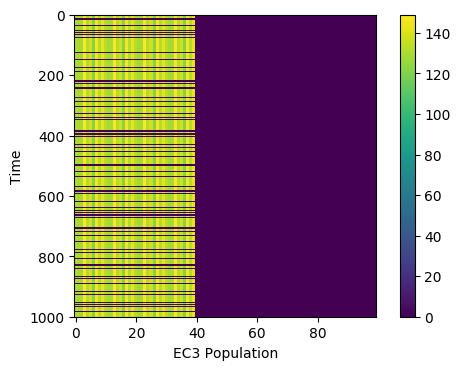

In [70]:


EC3_input = EC3_input_intensity * np.kron(feature_array, np.random.uniform(.8,1, (1,(EC3_size//len(feature_array))))) # rescales the input vector

#map(np.random.shuffle,EC3_input) # we just need to remove this to make the inputs deterministic

matrix = np.zeros((1000,100))
EC3_input = np.repeat(EC3_input,800,axis=0) # full duration EC3 input array



matrix[0:800, 0:100] = EC3_input
np.random.shuffle(matrix)
pylab.imshow(matrix, aspect=.1)
pylab.ylabel('Time')
pylab.xlabel('EC3 Population')
pylab.colorbar()

EC3_input = matrix
EC3_input = TimedArray(EC3_input*pamp, dt=.6*second )

## CA3 input algorithm
### Samples from a beta distribution

* CA3's activity pattern is always random. Even in the deterministic model. This is because of CA3's role in generating orthogonal vectors. Orthogonal vectors have to be different every time. 

In [71]:
def CA3_vector():
    global CA3_size
    global CA3_input_intensity
    ortho_CA3 = np.random.beta(1,3,(1,CA3_size))
    ortho_CA3[0,42:100] = 0 # limiting CA3 firing to only relevant cells
    CA3_input = CA3_input_intensity*ortho_CA3
    CA3_input = np.broadcast_to(CA3_input,(10000,CA3_size)) # the length of the trial should be a variable here. 
    CA3_input = TimedArray(CA3_input*pamp, dt=100*ms )
    return CA3_input

CA3_input= CA3_vector()



#CA3 = NeuronGroup(CA3_size, CA3_p_eqs, threshold='v>CA3_theta_reset', reset = CA3_post_spike) #threshold in this model is the peak threshold
#CA3_state = StateMonitor(CA3,('v'), record=True)

sim = Network(collect())
sim.store('all_connected')
sim.store('trial_0')

# 4. Simulations

## Testing short duration
### With short exposures, there should be minimal activity in CA1 with only EC3 input

In [17]:
#%%timeit -r 1
CA3_CA1.active = False
duration = 600*second
sim.run(duration)


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.07s, trying other methods took 0.11s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.07s, trying other methods took 0.12s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.03s, trying other methods took 0.14s). [brian2.stateupdaters.base.method_choice]
WARNING    Group uses a dt of 100. us while TimedArray uses dt of 0.6 s [brian2.input.timedarray]
INFO       No numerical integration method specified for group 'synapses', using method 'euler' (took 0.06s, trying other methods took 0.17s). [brian2.stateupdaters.base.method_choice]
WARNING    Note that the synaptic pathway 'synapses_pre' will run on the clock of the group 'neurongroup' using a dt of 100. us. Either the Synapses 

In [18]:
EC3_CA1_weights = np.asarray(EC3_CA1.w)
np.savez('/scratch/sanjay/new_folder/LTP_EC3_only', EC3_CA1_weights=EC3_CA1_weights)

sim.store('After familiarization 10 mins')

In [19]:
#sim.restore('trial_9')

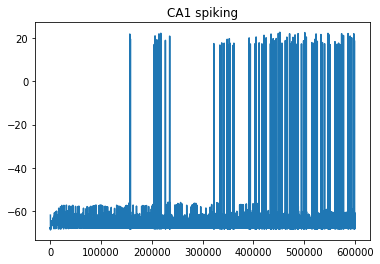

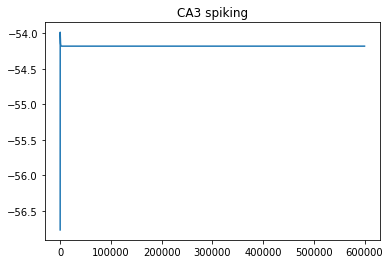

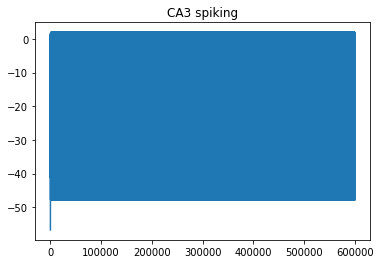

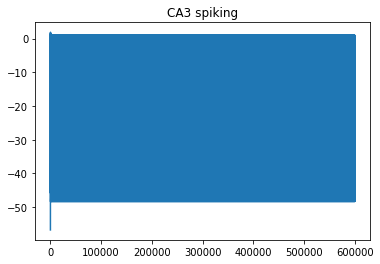

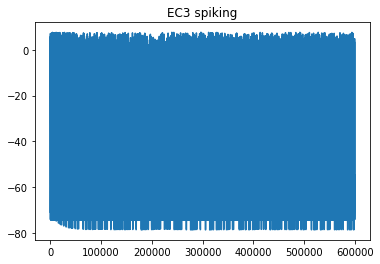

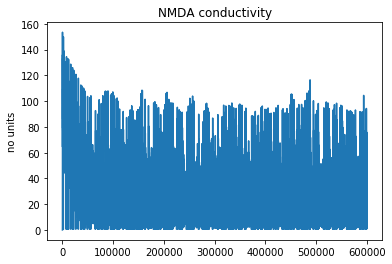

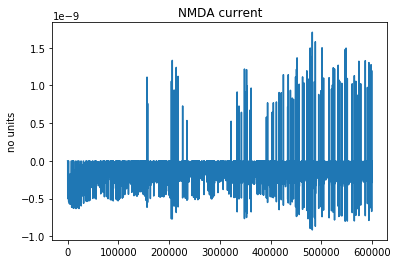

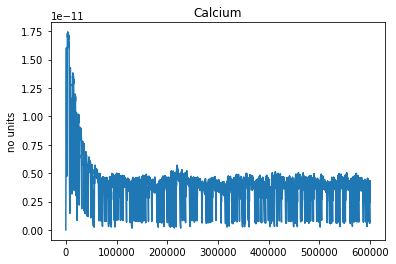

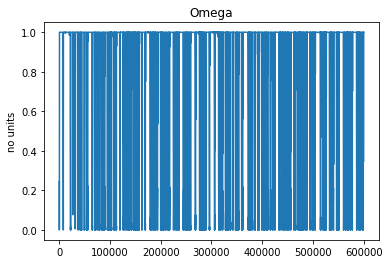

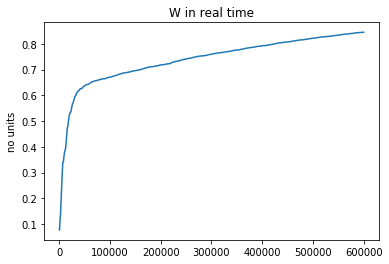

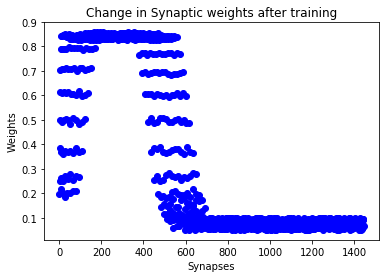

In [20]:
pylab.plot(CA1_state.t/ms,CA1_state.v[20]/mV)
pylab.title('CA1 spiking')
pylab.show()

pylab.plot(CA3_state.t/ms,CA3_state.v[1]/mV)
pylab.title('CA3 spiking')
pylab.show()

pylab.plot(CA3_state.t/ms,CA3_state.v[3]/mV)
pylab.title('CA3 spiking')
pylab.show()


pylab.plot(CA3_state.t/ms,CA3_state.v[6]/mV)
pylab.title('CA3 spiking')
pylab.show()


pylab.plot(EC3_state.t/ms,EC3_state.v[1]/mV)
pylab.title('EC3 spiking')
pylab.show()

#pylab.plot(CA1_state.t/ms,CA1_state.g_syn_EC3[5]/nS)
#pylab.title('Synaptic conductivity at EC3-CA1 synapse')
#pylab.ylabel('conductivity (nS)')
#pylab.show()

pylab.plot(CA1_state.t/ms,(CA1_state.NMDA_g_syn[15]/nS))
pylab.title('NMDA conductivity')
pylab.ylabel('no units')
pylab.show()

pylab.plot(CA1_state.t/ms,(CA1_state.I_NMDA[20]))
pylab.title('NMDA current')
pylab.ylabel('no units')
pylab.show()

pylab.plot(EC3_CA1_state.t/ms,(EC3_CA1_state.Ca[20]))
pylab.title('Calcium')
pylab.ylabel('no units')
pylab.show()

pylab.plot(EC3_CA1_state.t/ms,(EC3_CA1_state.Omega[20]))
pylab.title('Omega')
pylab.ylabel('no units')
pylab.show()

pylab.plot(EC3_CA1_state.t/ms,(EC3_CA1_state.w[20]))
pylab.title('W in real time')
pylab.ylabel('no units')
pylab.show()


pylab.plot((np.arange(1,len(EC3_CA1.w)+1,1)), EC3_CA1.w[:], 'bo')
pylab.title('Change in Synaptic weights after training')
pylab.xlabel("Synapses")
pylab.ylabel('Weights')

#pylab.plot(EC3_CA1_state.t, EC3_CA1_state.w[200])
#pylab.title('Example EC3 Synapse - Change in Synaptic strength')
#pylab.show()



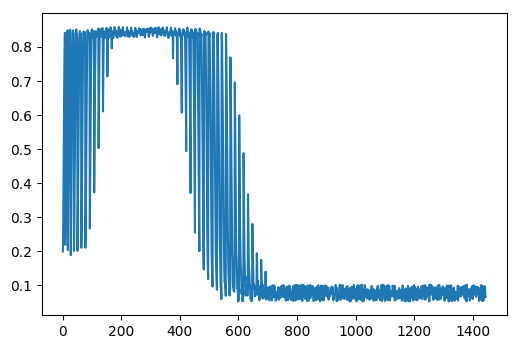

In [72]:
data = np.load('LTP_EC3_only.npz')
#data.keys()
EC3_CA1_weights = data['EC3_CA1_weights']

pylab.plot(np.arange(1,len(EC3_CA1.w)+1,1 ), data['EC3_CA1_weights'])

<synapses.w: array([ 0.19802744,  0.25145592,  0.38442013, ...,  0.09554202,
        0.07229025,  0.06539633])>


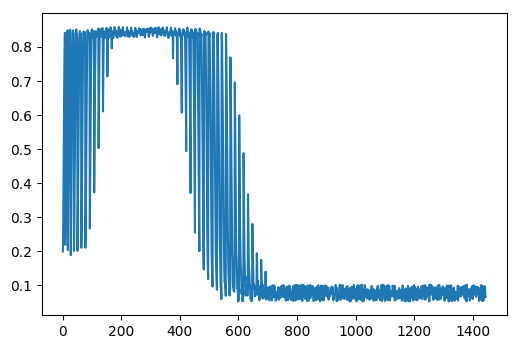

In [79]:
sim.restore('all_connected') # reset clock

CA3_CA1.active = False
EC3_CA1.w = data['EC3_CA1_weights']#EC3_CA1_weights # restore weights
print EC3_CA1.w
pylab.plot(np.arange(1,len(EC3_CA1.w)+1,1 ),EC3_CA1.w )


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.04s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses', using method 'euler' (took 0.03s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]


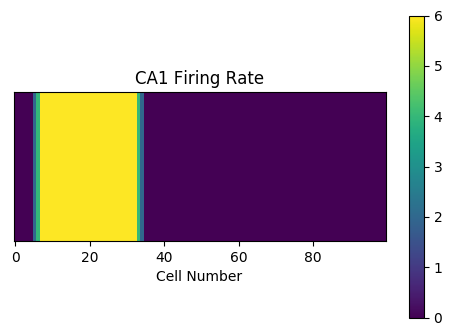

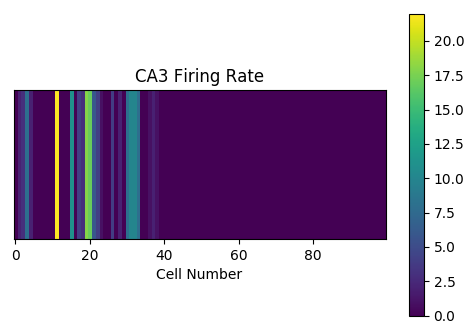

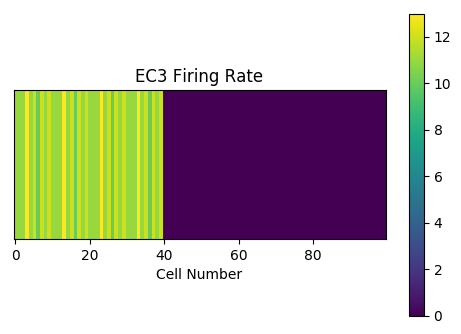

In [80]:

#EC3_CA1_weights = data['arr_0'] 

#EC3_CA1_weights = EC3_CA1.w # save the weights

sim.run(1*second)

CA1_heatmap = np.broadcast_to(np.asarray(CA1_spikes.count), (2, 100) )
CA3_heatmap = np.broadcast_to(np.asarray(CA3_spikes.count), (2, 100) )
EC3_heatmap = np.broadcast_to(np.asarray(EC3_spikes.count), (2, 100) )

pylab.imshow(CA1_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA1 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(CA3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA3 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(EC3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('EC3 Firing Rate')
pylab.colorbar()
pylab.show()


In [91]:
from __future__ import division

def sparseness(rates):
    # This sparseness measure is specific to only one stimulus. You need to re-write this if you want more than 
    # one stimulus
    sparse = (np.sum(rates)/100)
    return sparse


In [92]:
rates = np.asarray(CA1_spikes.count)
rates = rates/rates.max()
print rates.max()
print 'Sparseness in CA1 is {} '.format(sparseness(rates))
rates = np.asarray(CA3_spikes.count)
print 'Sparseness in CA3 is {}' .format(sparseness(rates))

1.0
Sparseness in CA1 is 0.28 
Sparseness in CA3 is 1.47


In [23]:

#weights.keys()

In [24]:
# a test for calcium based Omega function

calcium_input =  np.linspace(0,3,100) #* 1e-6 
B_2 = 80
B_1 = 80
alpha_2 = .25
alpha_1 = .05




def Omega(Cal):
    global B_1
    global B_2
    global alpha_1
    global alpha_2
    a = .25 + (exp(B_2*(Cal-alpha_2))/(1+exp(B_2*(Cal-alpha_2)))) - ((.25*exp(B_1*(Cal-alpha_1)))/(1+exp(B_1*(Cal-alpha_1))))
    return a
omega_vector = map(Omega, calcium_input)

#P1 = 3

def learning_rate(Ca):
    global P1
    tau_n = P1/((P1/(1e4)) + Ca**3) + 1 
    a = 1/tau_n
    return a

learning_vector = map(learning_rate, calcium_input)

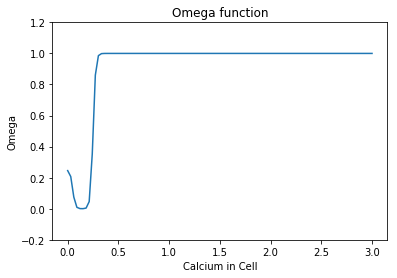

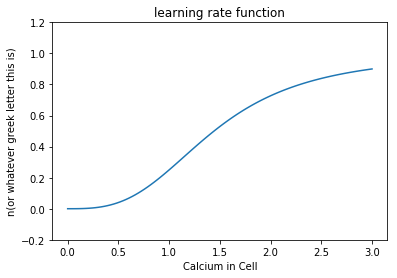

In [25]:
pylab.plot(calcium_input,omega_vector)
pylab.title('Omega function')
pylab.xlabel('Calcium in Cell')
pylab.ylabel('Omega')
pylab.ylim(-.2,1.2)
pylab.show()

pylab.plot(calcium_input,learning_vector)
pylab.title('learning rate function')
pylab.xlabel('Calcium in Cell')
pylab.ylabel('n(or whatever greek letter this is)')
pylab.ylim(-.2,1.2)
pylab.show()

In [26]:
2**3

8

In [27]:
#sim.run(1*second)

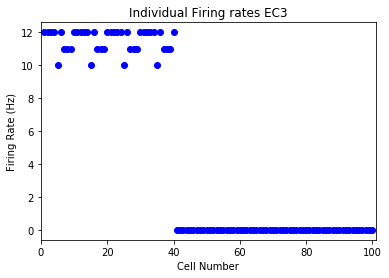

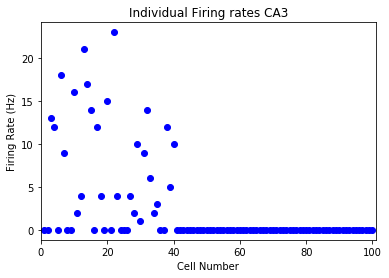

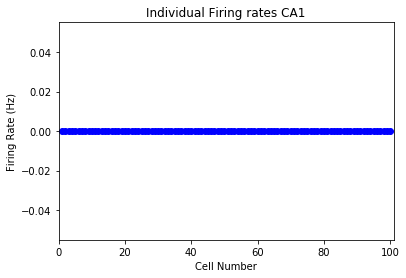

In [28]:
pylab.plot(range(1,len(EC3_spikes.count)+1),EC3_spikes.count, 'bo')

pylab.title('Individual Firing rates EC3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA3_spikes.count)+1),CA3_spikes.count, 'bo')
pylab.title('Individual Firing rates CA3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA3_size+1)

pylab.show()

pylab.plot(range(1,len(CA1_spikes.count)+1),CA1_spikes.count, 'bo')
pylab.title('Individual Firing rates CA1')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA1_size+1)

pylab.show()